## **Import And Load Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Telco_Customer_Churn_Dataset.csv to Telco_Customer_Churn_Dataset.csv


In [ ]:
import pandas as pd
import io

# Replace 'your_file.xlsx' with the name of your uploaded file
file_name = 'Telco_Customer_Churn_Dataset.csv'

# Read the Excel file
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first few rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Go insights data and work on problems**

In [ ]:
df['customerID'].nunique()  ## Make sure no ID duplicated

7043

In [ ]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
# Hanling 'No phone service' to 'No'

df.loc[df['MultipleLines'] == 'No phone service', 'MultipleLines'] = 'No'

In [ ]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.info() ## Show details of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Hanling 'No internet service' to 'No'

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  df.loc[df[col] == 'No internet service', col] = 'No'

In [ ]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now, you can check the data type of the 'TotalCharges' column
print(df['TotalCharges'].info())


<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB
None


In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].loc[df['TotalCharges'].isnull()]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [ ]:
# Replace Nulls to Zeros because all of this has zero month in service

df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = 0

In [ ]:
df.loc[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Categorical Encoding


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
binary_list = list(df.columns[df.nunique() == 2][2:])

In [ ]:
for col in binary_list:
  print(col, df[col].unique())

Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [ ]:
for col in binary_list:
  df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columns_to_encode = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
for col in columns_to_encode:
  # Create the OneHotEncoder object
  enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

  # Fit the encoder on the 'InternetService' column
  enc.fit(df[[col]])

  # Transform the 'InternetService' column into one-hot encoded features
  onehot_encoded = enc.transform(df[[col]])

  # Create a new DataFrame with the one-hot encoded features
  onehot_df = pd.DataFrame(onehot_encoded, columns=enc.get_feature_names_out([col]))

  # Convert the one-hot encoded columns to integers
  for col in onehot_df.columns:
    onehot_df[col] = onehot_df[col].astype(int)

  # Concatenate the one-hot encoded DataFrame with the original DataFrame
  df = pd.concat([df, onehot_df], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   InternetService                          7043 non-null   object 
 9   OnlineSecurity                           7043 non-null   int64  
 10  OnlineBackup                             7043 no

In [ ]:
# Make list of object columns
object_cols = list(df.select_dtypes(include=['object']).columns)

# Drop object columns
df = df.drop(columns=object_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is already defined as in your previous code

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # shuffle=True for better randomness

# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    print(f"  Train data shape: {X_train_fold.shape}")
    print(f"  Validation data shape: {X_val_fold.shape}")


Fold 1
  Train data shape: (4507, 27)
  Validation data shape: (1127, 27)
Fold 2
  Train data shape: (4507, 27)
  Validation data shape: (1127, 27)
Fold 3
  Train data shape: (4507, 27)
  Validation data shape: (1127, 27)
Fold 4
  Train data shape: (4507, 27)
  Validation data shape: (1127, 27)
Fold 5
  Train data shape: (4508, 27)
  Validation data shape: (1126, 27)


# Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import numpy as np

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results = {name: {"Accuracy": [], "ROC-AUC": [], "F1-Score": []} for name in models.keys()}

    # Train and evaluate each model
for name, model in models.items():
    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred = model.predict(X_val_fold)
    y_prob = model.predict_proba(X_val_fold)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, y_prob)
    f1 = f1_score(y_val_fold, y_pred)

    # Append results for this fold
    results[name]["Accuracy"].append(accuracy)
    results[name]["ROC-AUC"].append(roc_auc)
    results[name]["F1-Score"].append(f1)

# Compute mean and standard deviation of metrics across folds
mean_results = {}
for name, metrics in results.items():
    mean_results[name] = {
        "Accuracy": f"{np.mean(metrics['Accuracy']):.4f} ",
        "ROC-AUC": f"{np.mean(metrics['ROC-AUC']):.4f} ",
        "F1-Score": f"{np.mean(metrics['F1-Score']):.4f} "
    }

# Display results as a DataFrame
pd.DataFrame(mean_results).T

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,ROC-AUC,F1-Score
Random Forest,0.7904,0.8330,0.5630
Gradient Boosting,0.8046,0.8479,0.6071
XGBoost,0.7700,0.8143,0.5282


<ipython-input-53-4e298c823b1c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="Accuracy", data=df, ax=axes[0], palette=colors)
<ipython-input-53-4e298c823b1c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="ROC-AUC", data=df, ax=axes[1], palette=colors)
<ipython-input-53-4e298c823b1c>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="F1-Score", data=df, ax=axes[2], palette=colors)


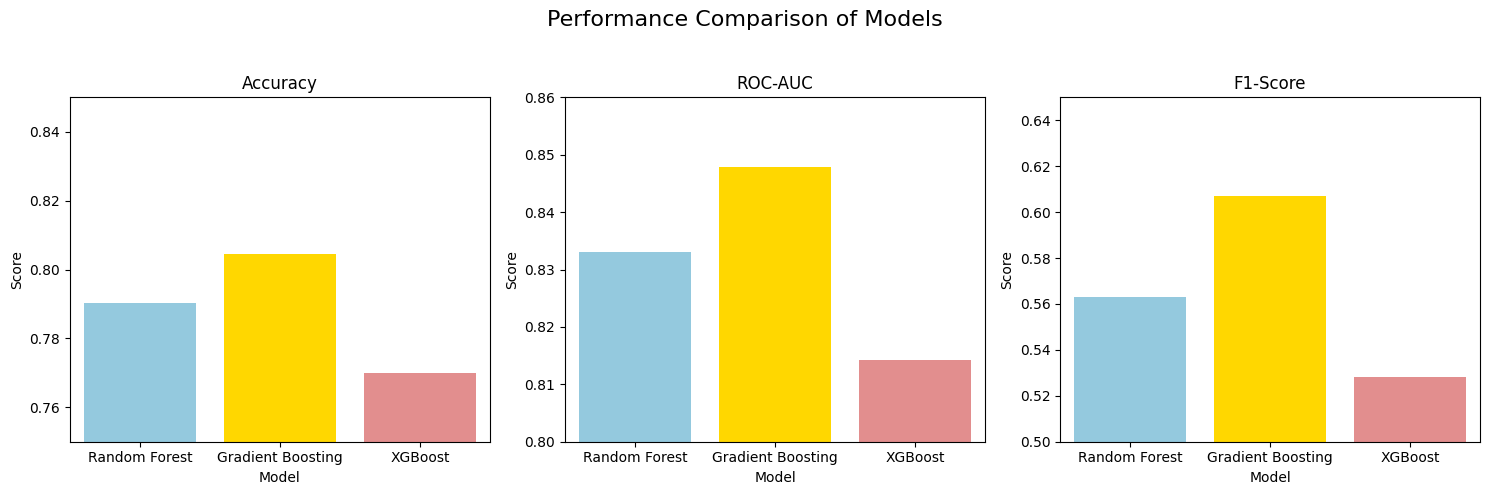

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the table
data = {
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [0.7904, 0.8046, 0.7700],
    "ROC-AUC": [0.8330, 0.8479, 0.8143],
    "F1-Score": [0.5630, 0.6071, 0.5282]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the model names as the index for easier plotting
df.set_index("Model", inplace=True)

# Create a figure with subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define colors for the bars (default color for all models)
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Function to highlight the best model in gold
def highlight_best(ax, data, metric):
    best_model = data[metric].idxmax()  # Find the best model for the metric
    best_idx = data.index.get_loc(best_model)  # Get the index of the best model
    ax.patches[best_idx].set_facecolor('gold')  # Change the color of the best bar to gold

# Plot Accuracy
sns.barplot(x=df.index, y="Accuracy", data=df, ax=axes[0], palette=colors)
axes[0].set_title("Accuracy")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0.75, 0.85)  # Adjust y-axis limits for better visualization
highlight_best(axes[0], df, "Accuracy")  # Highlight the best model

# Plot ROC-AUC
sns.barplot(x=df.index, y="ROC-AUC", data=df, ax=axes[1], palette=colors)
axes[1].set_title("ROC-AUC")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0.80, 0.86)
highlight_best(axes[1], df, "ROC-AUC")  # Highlight the best model

# Plot F1-Score
sns.barplot(x=df.index, y="F1-Score", data=df, ax=axes[2], palette=colors)
axes[2].set_title("F1-Score")
axes[2].set_ylabel("Score")
axes[2].set_ylim(0.50, 0.65)
highlight_best(axes[2], df, "F1-Score")  # Highlight the best model

# Add titles and adjust layout
plt.suptitle("Performance Comparison of Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title

# Show the plot
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'subsample': [0.8, 1.0]  # Subsample ratio of training instances
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the base model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Or other metrics like 'f1', 'roc_auc'
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8049320647248782


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier  # For classification tasks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier
# You can adjust hyperparameters like learning_rate, n_estimators, max_depth, etc.
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size at each iteration
    max_depth=3,       # Maximum depth of individual trees
    random_state=42
)

# Train the model on the training fold data
gb_model.fit(X_train_fold, y_train_fold)

# Validate the model on the validation fold data
y_val_pred = gb_model.predict(X_val_fold)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val_fold, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:")
print(classification_report(y_val_fold, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val_fold, y_val_pred))

# Optionally, retrain the model on the entire training data (if needed)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.80
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       815
           1       0.68      0.55      0.61       311

    accuracy                           0.80      1126
   macro avg       0.76      0.72      0.74      1126
weighted avg       0.80      0.80      0.80      1126

Validation Confusion Matrix:
[[736  79]
 [141 170]]

Test Accuracy: 0.80
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Test Confusion Matrix:
[[935 100]
 [181 193]]
